# GirlsWhoML Session 1: Linear regression

Authors: Melanie Roschewitz

In [3]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt

# Introduction

In the first class we will be learning about one of the simplest (yet still one of the most important) machine learning algorithms called *linear regression*, which is used for *linear models*.

In a linear model, we assume that the *labels* we want to predict can be obtained through a *linear transformation* of the *input features*.

When we have only one feature, the linear model reduces to the equation of a line, which we are all familiar with:

$$y = ax + b$$

Here the feature is denoted by $x$, the label by $y$, and $(a, b)$ are the *parameters* of the model.

The goal of the *linear regression* method, then, is to obtain the coefficients $(a, b)$ that best model the data (our features and labels). We explore how this is done in detail through an example below.

*Aside*. When reading machine learning literature you may encounter alternative terms for features and labels. Features may also be referred to as covariates, predictor variables, or independent variables. Labels are also known as targets, response variables, or dependent variables. They all have the same meaning though!

# Part A: Predicting exam grades

We will use the same dataset as we used in the lecture slides.

In this dataset, we assume ask a set of students about the number of hours they studied for a test, and record the grade they got at exam (out of 100).

We ask 25 students in total.

In [4]:
!pip install gdown

In [5]:
# Import plotting libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gdown
sns.set_style('whitegrid')

# Download the dataset.csv from Google drive to the notebook
gdown.download(id='1ppybKhO6G_XXhVB9H7Pdvizg-R2MWJsZ', output='dataset.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ppybKhO6G_XXhVB9H7Pdvizg-R2MWJsZ
To: /content/dataset.csv
100%|██████████| 266/266 [00:00<00:00, 70.3kB/s]


'dataset.csv'

## A.1. Load the collected dataset

We stored the dataset in a table (in .csv format). It's stored in `dataset.csv`. You could open it in Excel if you want.

However here we want to load it in our Python environment to build our linear regression model.

For that we can use the pandas library, a library that helps with working tabular datasets.

In [6]:
# Import the pandas library
import pandas as pd

# Load the dataset.csv file into a Python object
data = pd.read_csv('dataset.csv')

Let's look at the data we just loaded:

In [7]:
data

,Hours studied,Grade
0,0.53,9.0
1,3.97,45.0
2,7.29,82.0
3,3.24,40.0
4,2.40,31.0
5,5.82,64.0
6,1.32,23.0
7,2.72,32.0
8,7.19,83.0
9,0.47,8.0


In [8]:
# To select the data stored in the first column you can run the following:
number_of_hours_studied = data['Hours studied'].values

In [9]:
# The number_of_hours_studied contains an array (list).
# Let's print it
print(number_of_hours_studied)

[0.53 3.97 7.29 3.24 2.4  5.82 1.32 2.72 7.19 0.47 7.65 3.55 4.27 1.55
 1.54 6.81 7.75 8.83 7.79 4.32 3.48 8.   7.76 0.55 8.54]


In [10]:
# We can also get the shape of array with .shape command
number_of_hours_studied.shape

(25,)

In [11]:
# TODO: Get the grades column
grades = data['Grade'].values
print(grades)
grades.shape

[ 9. 45. 82. 40. 31. 64. 23. 32. 83.  8. 88. 39. 49. 22. 20. 68. 84. 89.
 82. 48. 34. 92. 82. 17. 90.]


(25,)

## A.2 Plot the collected data

Now let's plot the data. We want to plot the number of hours studied in the x-axis and the exam grade on the y-axis.

_Hint_: to plot a series of datapoints you can use the following command
`plt.scatter(x={the x-axis data}, y={the y-axis data})`

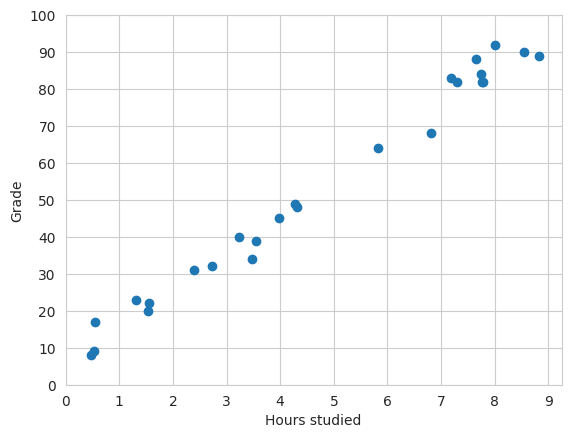

In [12]:
# TODO create the plot (use hint)
plt.scatter(x=number_of_hours_studied, y=grades)

# Optional: update the axes to make the plot pretty
plt.xlabel('Hours studied')
plt.ylabel('Grade')
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 101, 10))
plt.show()

# Part B: Fitting a simple linear model

Recall that our model is of the form

$$y = ax + b$$

or, in our case of the grade/study dataset,

$$\text{grade} = a \cdot \text{hours studied} + b$$

for some unknown $a$ and $b$. Our goal today will be to find the line (parameterised by $a$ and $b$) which fits our dataset the best.




## B-1: experimenting with lines

Below we provide a little function that plots the data points (as above), along with the line y = ax + b. Where you provide a and b as input to the model. This will allow to try different parameters by hand to try to find the best fitting a and b for this data.

In [13]:
def plot_data_and_model(a, b, x, y):
  '''
  This function plots the data points and the
  model y=ax+b.
  '''
  # Let's plot the data (re-use the same command as above)
  plt.scatter(x=number_of_hours_studied, y=grades)

  # Let's plot the predicted line
  # y = a*x + b
  x = np.linspace(0,10,50)
  y = a * x + b
  plt.plot(x, y, color='orange')

  # Optional: update the axes to make the plot pretty
  plt.xlabel('Hours studied')
  plt.ylabel('Grade')
  plt.xticks(np.arange(0, 10, 1))
  plt.yticks(np.arange(0, 101, 10))
  plt.show()

First, let's experiment with some possible values for $a$ and $b$. Try out some lines using another magic plotting function, setting different values for `a` and `b`.

*Can you find a line that best matches the data?*

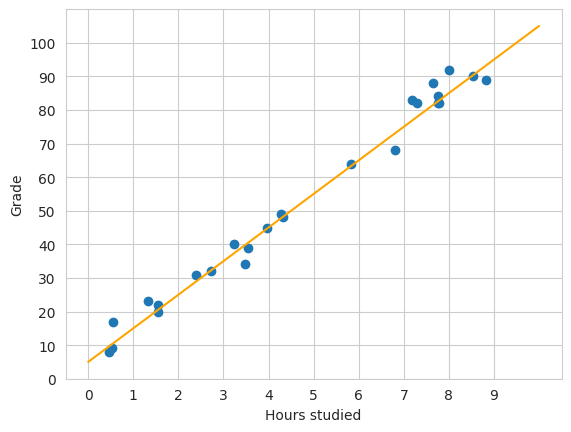

In [14]:
# TODO: Let's try it out
# Try various values of a and b and observe the effect on the line
plot_data_and_model(a=10, b=5, x=number_of_hours_studied, y=grades)

## B-2: computing the MSE

Recall that $\hat{y}_i$ is the value predicted by the model $\hat{y}_i = a x_i + b$, where $x_i$ in our case is the *petal length*, $y_i$ is the *petal width*.

The final expression for the mean squared error is therefore

$$ \frac{1}{N} \sum_{i=0}^{N-1} (a x_i + b - y_i)^2$$

The second task will ask you to write a function to compute the mean squared error of a given line for the iris dataset.

*Hint:* With all $x_i$ stored in `x` and all $y_i$ stored in `y`, the $x_i$ and $y_i$ in the dataset can be accessed through `x[i]` and `y[i]` respectively.

*Hint 2:* In Python to apply the same function f(x_i) = a * x_i + b to all elements of the vector x, you can simply to a * x + b. Feel free to try it out with the petal_width vector.


In [15]:
# TODO fill in the gaps to create the function to
# compute the MSE
def mean_squared_error(a, b, x, true_y):
  predicted_y = a * x + b
  squared_error = (predicted_y - true_y)**2 # corrected
  mse = np.mean(squared_error)
  return mse

In [16]:
mean_squared_error(a=5, b=0, x=number_of_hours_studied, true_y=grades)

np.float64(1073.5938)

In [17]:
mean_squared_error(a=10, b=5, x=number_of_hours_studied, true_y=grades)

np.float64(12.591199999999988)

Verify that your answer is correct by checking that, for `X` consisting of `hours studied` and `y` of `grades` your code returns:
* around 1073 for `a=5, b=0` and
* around 12 for `a=10, b=5`.

## B-3: Computing the least square estimate

As we discussed in class, the best coefficients $a$ and $b$ that minimise the mean squared error can be found analytically, using a bit of calculus.

The least squares estimate is defined as:

$$ a = \dfrac{\sum_i(x_i - \bar x)(y_i - \bar y)}{\sum_i(x_i - \bar x)^2}$$
&nbsp;
$$ b = \bar y - a \bar x$$

where $\bar x$ is the mean value of $[x_0, \dots, x_{N-1}]$ and so on.


Use the above expressions for $a$ and $b$ that minimise the MSE to get the least squares coefficients for the iris dataset.
* *Hint*: you might find it helpful to first compute the sum terms separately, e.g. compute `sum_xy`, `mean_x`, `mean_y` and use these variables in the expressions for `a` and `b`.



In [18]:
# TODO get the least square estimates
def get_least_squares_estimate(x, y):
  x_bar = np.mean(x)
  y_bar = np.mean(y)
  a_nominator = np.sum((x - x_bar) * (y - y_bar))
  a_denominator = np.sum((x - x_bar)**2)
  a = a_nominator / a_denominator
  b = y_bar - a * x_bar
  return a, b

In [19]:
# Compute the estimates with our collected data
a, b = get_least_squares_estimate(x=number_of_hours_studied, y=grades)
print(a, b)

10.02575996838885 5.783093012370095


Plot the resulting line using the function from above `plot_data_and_model(a, b)`. How does this line fit the data?

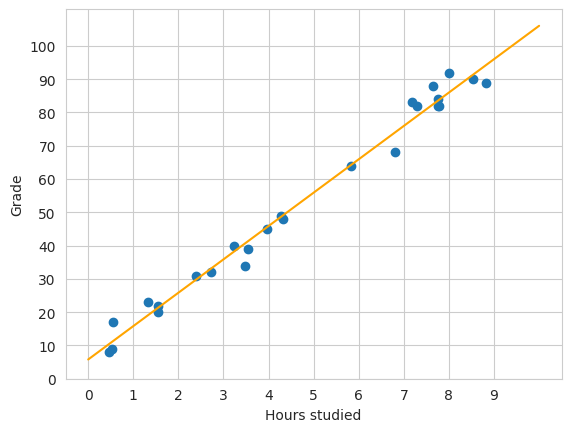

In [20]:
# Let's plot the result
plot_data_and_model(a=a, b=b, x=number_of_hours_studied, y=grades)

Compute the MSE for the coefficients you obtained. How does it compare to the MSE of the lines you tried to find by hand?

In [21]:
mean_squared_error(a=a, b=b, x=number_of_hours_studied, true_y=grades)

np.float64(11.768753036563133)

# Part C: Using the model to predict grades for new students from their studied hours.



## C-1 Predicting grades
In the previous sections, we found the coefficients `a` and `b` that best describe the dataset of our 25 observations. However, the main reason we do this estimation is so that we can predict the labels for *new*, unseen observations.

Let's say we have 3 new students coming in, they studied 2, 5 and 6 hours. Based on our model, what grades will they get?

In [22]:
number_of_hours_studied_unseen = np.array([2, 5, 6])

First, use the plot above to make some estimate of the grades.

Then use the equation of line and the coefficients you computed in B-3 to confirm these predictions

In [23]:
predicted_grades = np.array([26, 56, 66])
print(predicted_grades)

[26 56 66]


Now let's assume that these students took the test, and we recorded there real grades. Can you compute the MSE for these students?

In [24]:
real_grades_unseen = np.array([21, 60, 66])

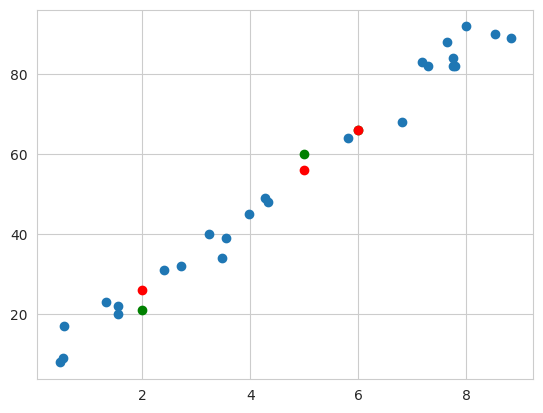

In [25]:
# Let's plot the training data, used for finding the coefficients, together with the new test data points.
plt.scatter(x=number_of_hours_studied, y=grades)
plt.scatter(x=number_of_hours_studied_unseen, y=real_grades_unseen, color='green')
# Let's add our predictions as well
plt.scatter(x=number_of_hours_studied_unseen, y=predicted_grades, color='red')

How far are the predictions?

## C-2: Measuring the test MSE
Let's compute the MSE for these 3 test data points.

In [26]:
mean_squared_error(a=a, b=b, x=number_of_hours_studied_unseen, true_y=real_grades_unseen)

np.float64(13.36332985773016)

This is nearly as good as the MSE we got on our training data! This means that our model _generalises_ well to new test points, even if they were not used to fit the line!

## C-3 Now let's compute the Mean Absolute Error as well.

The MSE is very good for training the model, however it is difficult to interpret. For the test data, it is sometimes prefered to use the MAE instead because this is the average distance between predictions and true labels. For example if our MAE is 10 for our problem, it means that on average our prediction error is about 10 points on the exam.

The formula for MAE is:
$$ \text{MAE} = \frac{1}{N} \sum_{i=0}^{N-1} |a x_i + b - y_i|$$

In [29]:
#TODO
def compute_mae(a, b, x, true_y):
  predicted_y = a * x + b
  mae = np.mean(np.abs(predicted_y - true_y)) # corrected
  return mae

compute_mae(a=a, b=b, x=number_of_hours_studied_unseen, true_y=real_grades_unseen)

np.float64(2.9950224240434147)

# Task D: using sklearn instead of manual computation

In the lecture we mentioned that [sklearn](https://scikit-learn.org/stable/index.html) is a great package to help with machine learning tasks in python.

With sklearn we can find the least square estimate (best line fit) automatically without needing to compute them by hand. This is what we will do here!

In [31]:
from sklearn import linear_model

# First we define the linear model
model = linear_model.LinearRegression()

# Next we need to 'fit' the model
# This means finding the best coefficents

# For this sklearn expects that the X data
# is of the shape [N_Example, N_X_variables]
# here we have 25 examples, and 1 variable x
# so we can run
X = number_of_hours_studied.reshape(25, 1)

# Now let's fit the model
model.fit(X=X, y=grades)

# Let's print the slope and the bias (intercept)
model.coef_, model.intercept_

(array([10.02575997]), np.float64(5.783093012370074))

Compare with the coefficients we got in task B-3.

Let's plot the result as well

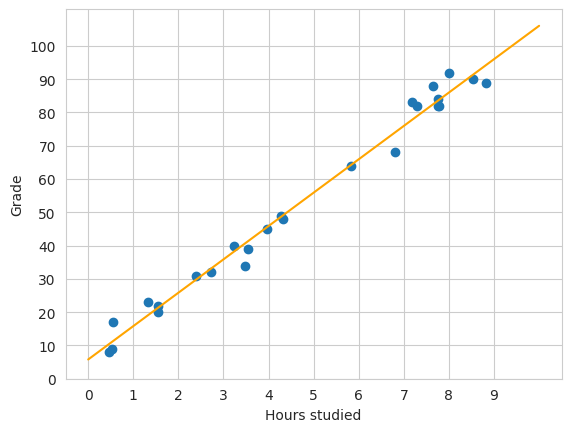

In [32]:
plot_data_and_model(a=model.coef_[0], b=model.intercept_, x=number_of_hours_studied, y=grades)

To predict on new test data, we can simple call `model.predict(X=X_test)`

In [33]:
predicted_sklearn = model.predict(X=number_of_hours_studied_unseen.reshape(3,1))
predicted_sklearn

array([25.83461295, 55.91189285, 65.93765282])

Compare with the previous predictions

In [34]:
# Sklearn also has MSE and MAE already implemented

from sklearn.metrics import mean_squared_error, mean_absolute_error

print('MSE: ', mean_squared_error(y_true=real_grades_unseen, y_pred=predicted_sklearn))
print('MAE: ', mean_absolute_error(y_true=real_grades_unseen, y_pred=predicted_sklearn))

MSE:  13.363329857730136
MAE:  2.9950224240434125


# Task E: The house price problem: when we have more than one variable to use to make our prediction.

In this section, you will try to fit a linear regression model to a dataset with
higher dimensional input features. We choose to model the housing price as a fucntion of the property's location and its size, using a synthetic dataset that we created.

First, try to plot this dataset using the code below. You can rotate the 3D graph to observe the data better. Are the data samples linear?


In [35]:
# generate the housing price dataset
location = np.array([1, 1, 2, 2, 3, 3, 4, 4, 4, 5]) # For example the neighborhood number
size = np.array([50, 90, 30, 40, 36, 45, 40, 78, 108, 200])
price = np.array([300, 500, 300, 350, 450, 500, 400, 600, 800, 400])

# How many samples do we have?
print(location.shape, size.shape, price.shape)

(10,) (10,) (10,)


We want to fit a linear model:

$$\text{price} = a_1\text{location} + a_2\text{size} + b$$

That is we model the price of the house as a function of the size of the house and it's location.


Let's use `sklearn` to fit our linear model. For that first we need to create a big matrix X that has 10 rows (one for each data point) and 2 columns (the first is location and the second is the size).

_Hint_: you can use the `np.stack([column1, column2], axis=1)` function to put two lists together as two columns

In [37]:
#TODO create the big matrix X
X = np.stack([location, size], axis = 1)

print(X.shape) # should be [10, 2]

(10, 2)


In [48]:
# TODO
# Let's create our model
model = linear_model.LinearRegression()
# Let's fit the model

model.fit(X=X, y=price)

print(f'The fitted model is price = {model.coef_[0]} * location + {model.coef_[1]} * size + 317')

The fitted model is price = 42.649843323576036 * location + 0.25659375275112234 * size + 317


Five new properties just arrived on the market. Let's predict the price at which they will sell using our model.

In [49]:
new_location = np.array([3, 4, 2])
new_size = np.array([80, 30, 60])

In [50]:
# Let's get the predictions

# Like above first create X_test of size [3, 2]
X_test = np.stack([new_location, new_size], axis=1)

# Get predicted prices
predicted_prices = model.predict(X=X_test)

print(predicted_prices)

[466.39471248 496.21486817 418.6129941 ]


In [51]:
# The real prices of these properties are
real_prices_new = np.array([450, 550, 400])

In [52]:
# TODO
# Let's compute MAE and MSE for this test data (see above for syntax)

MAE = mean_absolute_error(y_true=real_grades_unseen, y_pred=predicted_sklearn)
MSE = mean_squared_error(y_true=real_grades_unseen, y_pred=predicted_sklearn)

print('MAE: ', MAE)
print('MSE: ', MSE)

MAE:  2.9950224240434125
MSE:  13.363329857730136
